Window: 442 samples (20ms)
2214630 2281740
Time: 1.1761605201366496 x realtime
Segments: [(233, 1289), (4596, 10835), (14744, 18814), (38587, 39968), (41527, 47958), (49309, 53795), (56782, 60798), (63378, 66437)]


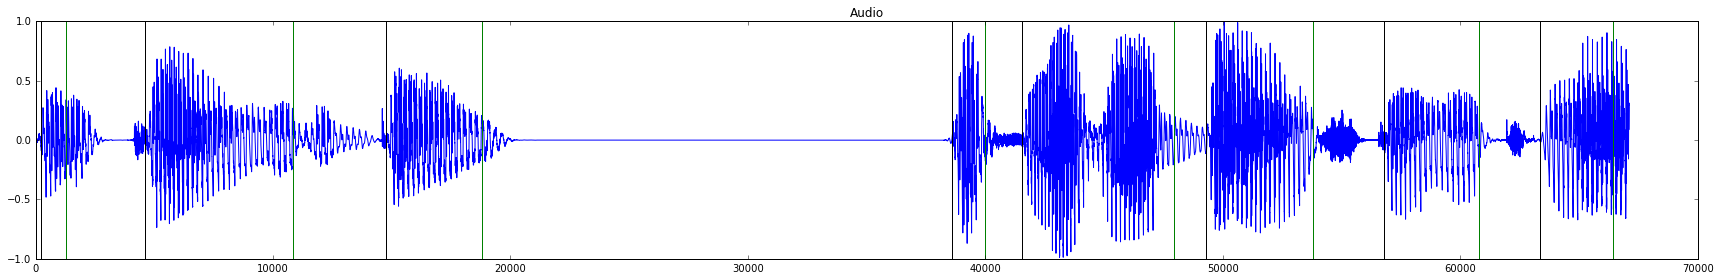

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import IPython.display
import time
from scipy.signal import hamming, resample
from scipy.io import wavfile

from listen.audio.io import read
from listen.audio.segmentation import *
from listen.spectrogram.spectrogram import Spectrogram

samples = 'abk.wav'
rate, data = read(samples, rate=22050)

c = np.random.randint(0, 100)
st =  c * (len(data) // 100)
en = (c + 1) * (len(data) // 100)
data = data[st:en]
min_duration = 20

wsize = (rate * min_duration) // 1000
if wsize % 2 == 1:
    wsize += 1

N = len(data)
print("Window: {} samples ({}ms)".format(wsize, min_duration))
print(st, en)
data = data / np.max(data)

start_time = time.time()

segments = segment_speech(data, np.ones(N), wsize, timecodes=True)

end_time = time.time()
print("Time: {} x realtime".format((end_time - start_time) / ((en - st) / rate)))
print("Segments:", segments)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 4))

ax.plot(data)
ax.set_title('Audio')

for s in segments:
    ax.axvline(x=s[0], color='black')
    ax.axvline(x=s[1], color='green')
fig.tight_layout()
plt.show()
IPython.display.display(IPython.display.Audio(data=data, rate=rate))
# IPython.display.Audio(data=xs, rate=rate)